<a href="https://colab.research.google.com/github/reemaranisahoo1996/Data-Analysis-using-Python-PowerBI/blob/main/Coffee_shop_data_analysis/coffee_shop_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing DataSet

In [ ]:
df=pd.read_excel('/content/Coffee Shop Sales.xlsx')

In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [ ]:
df.shape[0]

149116

In [ ]:
df.shape[1]

11

In [ ]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


# Modifying Date time column to desired format

In [ ]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  total_sales       149116 non-null  float64       
 12  month             149116 non-null  int32         
 13  month_name        149116 non-null  object        
 14  day_

In [ ]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

# Analysis By Total Sales



In [ ]:
df['total_sales']=df['transaction_qty']* df['unit_price']

In [ ]:
df['total_sales']

,total_sales
0,6.00
1,6.20
2,9.00
3,2.00
4,6.20
...,...
149111,5.00
149112,6.00
149113,3.00
149114,3.75


In [ ]:
df.transaction_date.unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 181, dtype: datetime64[ns]

In [ ]:
sales_by_day=df.groupby('transaction_date')['total_sales'].sum()

In [ ]:
sales_by_day.tail(5)

,total_sales
transaction_date,
2023-06-26,5875.90
2023-06-27,5975.65
2023-06-28,4728.90
2023-06-29,4450.75
2023-06-30,5481.32


In [ ]:
df['month']=df['transaction_date'].dt.month

In [ ]:
df['month_name']=df['transaction_date'].dt.month_name()

In [ ]:
df['month_name']

,month_name
0,January
1,January
2,January
3,January
4,January
...,...
149111,June
149112,June
149113,June
149114,June


# Total Monthly sales analysis


In [ ]:
sales_by_month=df.groupby(['month','month_name'])['total_sales'].sum().sort_index()

<Axes: xlabel='month,month_name'>

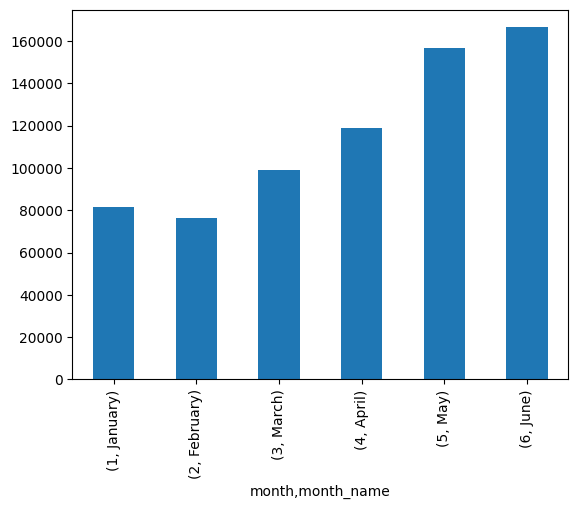

In [ ]:
sales_by_month.plot(kind='bar')

In [ ]:
sales_by_month=sales_by_month.to_frame()

In [ ]:
sales_by_month

,,total_sales,diff
month,month_name,,
1,January,81677.74,NaN
2,February,76145.19,-5532.55
3,March,98834.68,22689.49
4,April,118941.08,20106.40
5,May,156727.76,37786.68
6,June,166485.88,9758.12


### MoM growth Analysis

In [ ]:
sales_by_month['diff']= (sales_by_month['total_sales'] - sales_by_month['total_sales'].shift(1))*100/sales_by_month['total_sales'].shift(1)

In [ ]:
sales_by_month

,,total_sales,diff
month,month_name,,
1,January,81677.74,NaN
2,February,76145.19,-6.773633
3,March,98834.68,29.797667
4,April,118941.08,20.343466
5,May,156727.76,31.769242
6,June,166485.88,6.226159


# Total Monthly order analysis

In [ ]:
orders_by_month=df.groupby(['month','month_name'])['transaction_id'].count().sort_index()

In [ ]:
orders_by_month

,,transaction_id
month,month_name,
1,January,17314
2,February,16359
3,March,21229
4,April,25335
5,May,33527
6,June,35352


<Axes: xlabel='month,month_name'>

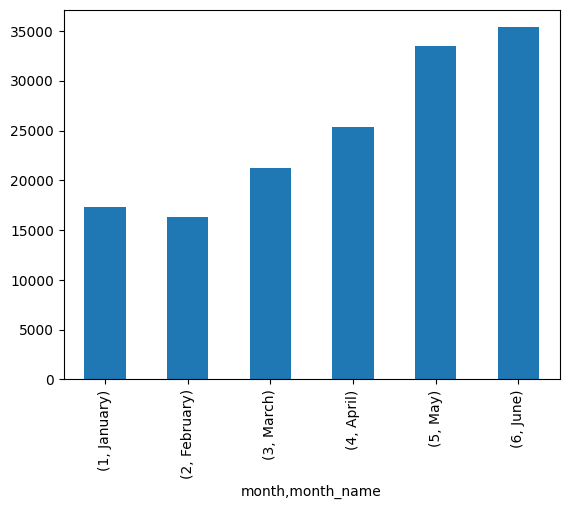

In [ ]:
orders_by_month.plot(kind='bar')

In [ ]:
orders_by_month=orders_by_month.to_frame()

### MoM growth Analysis -Orders

In [ ]:
orders_by_month['diff']=(orders_by_month['transaction_id']-orders_by_month['transaction_id'].shift(1))*100/orders_by_month['transaction_id'].shift(1)

In [ ]:
orders_by_month

,,transaction_id,diff
month,month_name,,
1,January,17314,NaN
2,February,16359,-5.515768
3,March,21229,29.769546
4,April,25335,19.341467
5,May,33527,32.334715
6,June,35352,5.443374


# Total Quantity Sold Analysis

In [ ]:
quantity_by_month=df.groupby(['month', 'month_name'])['transaction_qty'].sum()

<Axes: xlabel='month,month_name'>

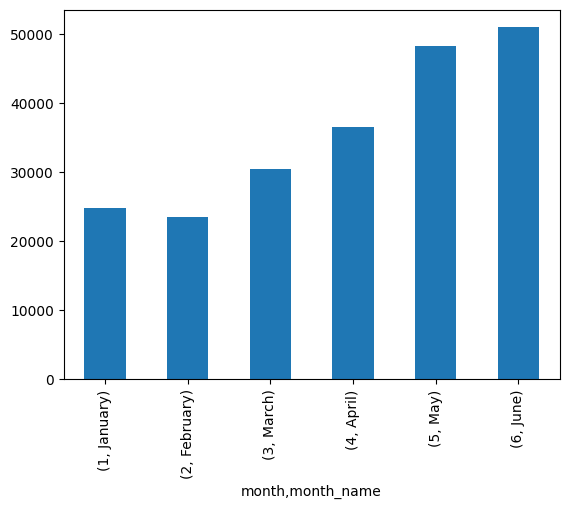

In [ ]:
quantity_by_month.plot(kind='bar')

In [ ]:
type(quantity_by_month)

pandas.core.series.Series

In [ ]:
quantity_by_month=quantity_by_month.to_frame()

###  MoM growth Analysis by Quantity

In [ ]:
quantity_by_month['diff']=(quantity_by_month['transaction_qty']-quantity_by_month['transaction_qty'].shift(1))/quantity_by_month['transaction_qty'].shift(1)*100

In [ ]:
quantity_by_month

,,transaction_qty,diff
month,month_name,,
1,January,24870,NaN
2,February,23550,-5.307600
3,March,30406,29.112527
4,April,36469,19.940143
5,May,48233,32.257534
6,June,50942,5.616487


## Weekly Analysis

In [ ]:
df['day_of_week']=df['transaction_date'].dt.day_of_week

In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,month_name,day_of_week
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,January,6
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,6
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,January,6
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,January,6
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,6,June,4
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,6,June,4
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,6,June,4
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,6,June,4


## Categorizing into Weekends and Weekdays

In [ ]:
df['day_type']=df['day_of_week'].apply(lambda x: 'weekend' if x >=5 else 'weekday')

In [ ]:
df['day_type']

,day_type
0,weekend
1,weekend
2,weekend
3,weekend
4,weekend
...,...
149111,weekday
149112,weekday
149113,weekday
149114,weekday


# Sales Analysis by weekday and weekend

In [ ]:
sales_by_day_type=df.groupby('day_type')['total_sales'].sum()

<Axes: ylabel='total_sales'>

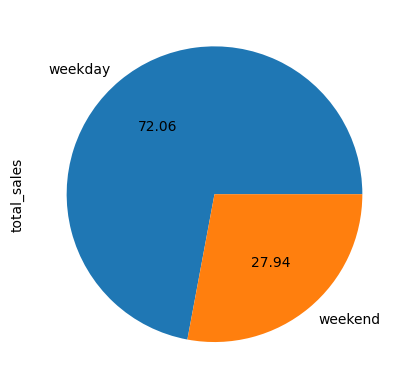

In [ ]:
sales_by_day_type.plot(kind='pie', autopct='%1.2f')

<Axes: ylabel='total_sales'>

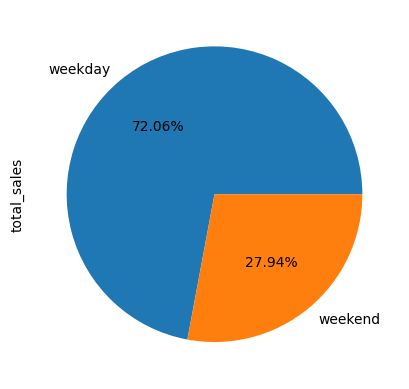

In [ ]:
# prompt: want a autopct upto 2 decimal

sales_by_day_type.plot(kind='pie', autopct='%1.2f%%')


In [ ]:
sales_by_monthly_daytype=df.groupby(['month_name', 'day_type'])['total_sales'].sum()

<Axes: xlabel='month_name'>

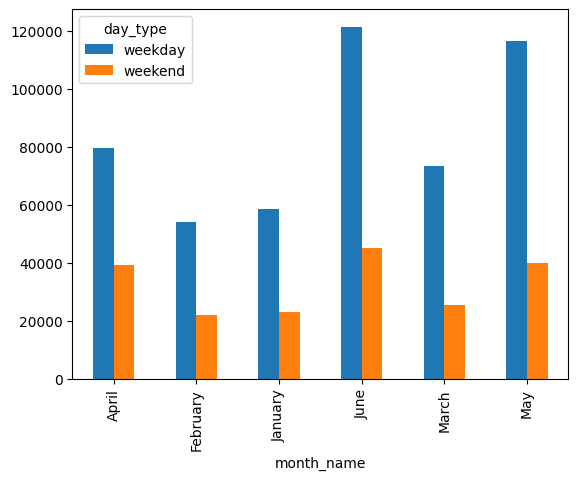

In [ ]:
sales_by_monthly_daytype.unstack().plot(kind='bar')

## Hourly Analysis

In [ ]:
df1=df.copy()

In [ ]:
import pandas as pd

# Convert 'transaction_time' column to datetime if it's not already
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

# Extract hour from 'transaction_time'
df['transaction_hour'] = df['transaction_time'].dt.hour


In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,month_name,day_of_week,day_type,transaction_hour
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,January,Sunday,weekend,7
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,weekend,7
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,January,Sunday,weekend,7
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,January,Sunday,weekend,7
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,January,Sunday,weekend,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,1900-01-01 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,6,June,Friday,weekday,20
149112,149453,2023-06-30,1900-01-01 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,6,June,Friday,weekday,20
149113,149454,2023-06-30,1900-01-01 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,6,June,Friday,weekday,20
149114,149455,2023-06-30,1900-01-01 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,6,June,Friday,weekday,20


In [ ]:
monthly_hourly_sales=df.groupby(['month_name','transaction_hour'])['total_sales'].sum()

In [ ]:
monthly_hourly_sales1=monthly_hourly_sales.values.reshape(6,15)

In [ ]:
month=df['month_name'].unique().tolist()

In [ ]:
month

['January', 'February', 'March', 'April', 'May', 'June']

In [ ]:
hours=df['transaction_hour'].unique().tolist()
hours=sorted(hours)
hours

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
sales_hourly_month=pd.DataFrame(monthly_hourly_sales1, columns=hours, index=month)

In [ ]:

sales_hourly_month

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
January,3772.28,10500.67,13723.07,14609.25,15450.93,8216.87,6902.49,6553.33,6933.05,7144.65,7065.31,7012.89,5763.00,4823.96,469.33
February,2390.50,7172.83,8896.36,9161.01,9676.23,4773.98,4585.49,4253.85,4687.13,4548.57,4649.78,4261.29,3747.84,2992.92,347.41
March,2485.75,7528.07,9970.45,10526.38,10115.02,5162.79,4776.24,4613.26,4788.24,4802.34,4672.51,4668.55,3977.67,3277.64,312.83
April,5217.93,14940.13,19229.57,20002.33,21246.62,11544.02,9537.84,9862.54,9929.50,9960.83,9530.46,9288.49,8405.69,6995.85,794.08
May,3120.88,9034.09,12058.11,11725.29,12545.46,6309.32,5520.94,5705.26,5909.16,5751.56,6050.38,5936.24,4712.09,4099.84,356.06
June,4912.93,14350.68,18822.31,19145.27,19639.13,10312.16,8869.79,9379.21,9057.66,9525.15,9154.31,8966.85,7679.91,6256.47,655.93


Text(0.5, 1.0, 'Monthly Hourly Sales')

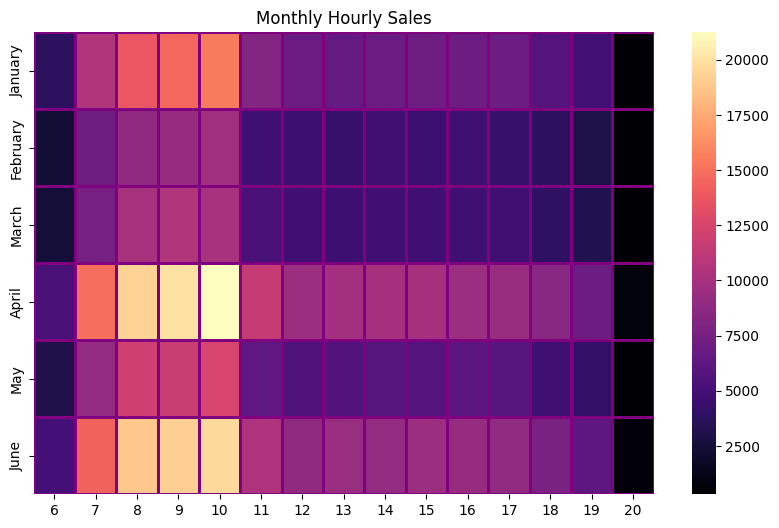

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sales_hourly_month, cmap= 'magma', linecolor="purple", linewidths=1)
plt.title('Monthly Hourly Sales')

In [ ]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'total_sales', 'month', 'month_name', 'day_of_week', 'day_type',
       'transaction_hour'],
      dtype='object')

In [ ]:
df['day_of_week']=df['transaction_date'].dt.day_name()

In [ ]:
days=df['day_of_week'].unique()

In [ ]:
days.tolist()

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [ ]:
hours

### Monthly Filter

In [ ]:
sales_daily_hourly=df.groupby(['day_of_week', 'transaction_hour'])['total_sales'].sum()

In [ ]:
sales_daily_hourly

day_of_week  transaction_hour
Friday       6                    3385.73
             7                    9386.04
             8                   11746.65
             9                   12750.00
             10                  13155.66
                                   ...   
Wednesday    16                   5649.76
             17                   5649.55
             18                   5166.35
             19                   3828.55
             20                    430.83
Name: total_sales, Length: 105, dtype: float64

In [ ]:
data=sales_daily_hourly.values.reshape(7,15)

In [ ]:
sales_daily_hourly.values

array([ 3385.73,  9386.04, 11746.65, 12750.  , 13155.66,  6827.84,
        5685.49,  5499.49,  5840.33,  6098.13,  5654.93,  5687.14,
        5139.84,  4128.2 ,   387.53,  3098.58,  9516.52, 11604.69,
       11898.33, 12427.25,  7179.09,  6139.64,  5771.26,  6463.31,
        6159.49,  6139.96,  5927.35,  5006.19,  4015.22,   330.4 ,
        2913.85,  8775.02, 11370.86, 11333.85, 12736.48,  6361.41,
        5957.75,  5549.45,  5626.89,  5946.5 ,  5825.73,  5444.7 ,
        4642.4 ,  3970.96,   438.63,  3320.73,  8892.09, 11615.54,
       12388.75, 12382.75,  6118.99,  5622.99,  5908.18,  5765.62,
        5614.75,  5728.46,  5788.39,  4792.48,  4006.71,   383.88,
        3464.9 ,  9209.23, 11420.49, 10963.73, 12091.09,  6898.55,
        6073.93,  5972.46,  6114.61,  6087.68,  6400.13,  6027.33,
        5234.58,  4529.1 ,   279.97,  2320.25,  8841.71, 12950.19,
       13588.47, 13497.68,  5877.41,  5172.64,  5443.46,  5621.56,
        5852.24,  5723.78,  5609.85,  4304.36,  3967.94,   684

In [ ]:
hourly_daily_sales=pd.DataFrame(data, columns=hours, index=days)

Text(0.5, 1.0, 'Monthly Hourly Sales')

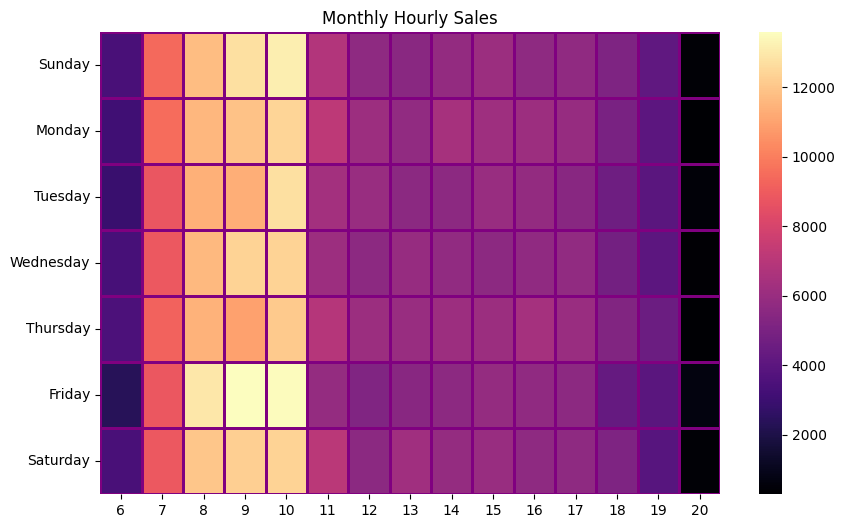

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(hourly_daily_sales, cmap= 'magma', linecolor="purple", linewidths=1)
plt.title('Monthly Hourly Sales')

# Month wise sales Analysis

#### create a monthly filter

In [ ]:
## Create monthly fiter
filter=df[df['month']==6]

### perform grouping by day and hours

In [ ]:
## group it by days and hours
sales_daily_hourly_filter=filter.groupby(['day_of_week', 'transaction_hour'])['total_sales'].sum()

### Convert the series output to dataframe

In [ ]:
df2=sales_daily_hourly_filter.to_frame()

### create a pivot out of that

In [ ]:
df2=df2.pivot_table(index='day_of_week',
                          columns='transaction_hour',
                          values='total_sales',
                          aggfunc='sum',
                          fill_value=0)
df2

transaction_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day_of_week,,,,,,,,,,,,,,,
Friday,967.65,2877.78,3144.78,3396.89,3577.46,2295.64,1498.64,1625.64,1565.03,1498.53,1506.43,1423.14,1439.99,1322.37,58.30
Monday,1267.43,2297.83,2225.50,2610.70,2540.20,1427.05,1343.90,1393.15,1392.65,1302.50,1216.00,1336.95,1253.90,911.90,0.00
Saturday,1176.90,2187.40,2093.65,2649.00,2901.60,2065.95,1317.55,1165.20,1403.25,1352.70,1192.15,1235.05,1216.00,860.70,0.00
Sunday,1042.95,2162.48,2583.75,2267.83,2562.85,1433.83,1353.00,1462.60,1471.36,1234.05,1398.25,1406.30,949.60,855.85,0.00
Thursday,726.50,2341.21,2763.18,2728.53,2908.65,2132.20,1749.90,1788.80,1695.23,1757.35,1866.38,1616.70,1684.30,1449.45,42.30
Tuesday,0.00,1771.50,3112.33,3004.93,3244.53,1097.00,1203.30,1103.55,1336.40,1619.40,1393.05,1294.45,926.50,825.38,326.25
Wednesday,36.50,1301.93,3306.38,3344.45,3511.33,1092.35,1071.55,1323.60,1065.58,1196.30,958.20,975.90,935.40,770.20,367.23


### create a heapmap to visualize the sales intensity

Text(0.5, 1.0, 'Monthly Hourly Sales')

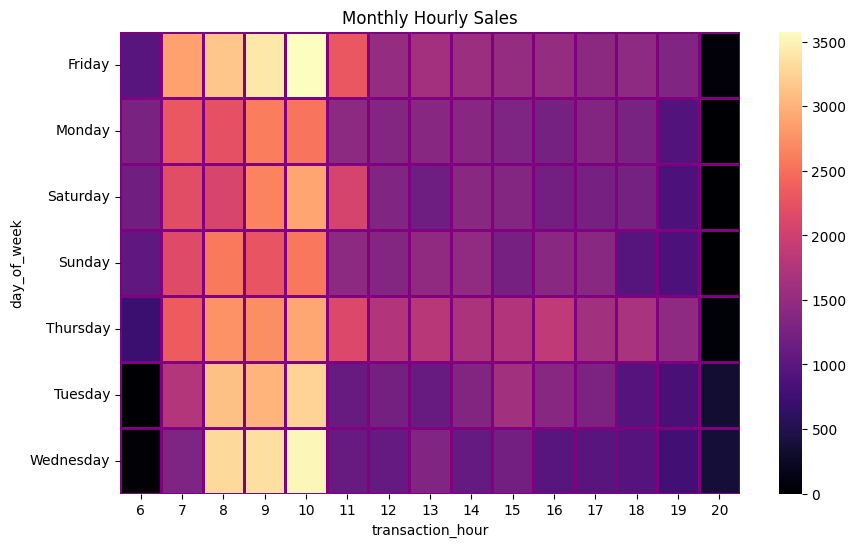

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df2, cmap= 'magma', linecolor="purple", linewidths=1)
plt.title('Monthly Hourly Sales')

In [ ]:
orders_by_daytype=df.groupby('day_type')['transaction_id'].count()

In [ ]:
orders_by_daytype

,transaction_id
day_type,
weekday,107510
weekend,41606


<Axes: ylabel='transaction_id'>

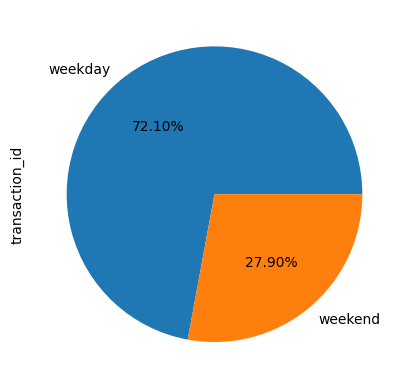

In [ ]:
orders_by_daytype.plot(kind='pie', autopct='%1.2f%%')

In [ ]:
orders_by_month_day_type=df.groupby(['month_name', 'day_type'])['transaction_id'].count()

In [ ]:
orders_by_month_day_type

month_name  day_type
April       weekday     16940
            weekend      8395
February    weekday     11605
            weekend      4754
January     weekday     12383
            weekend      4931
June        weekday     25883
            weekend      9469
March       weekday     15759
            weekend      5470
May         weekday     24940
            weekend      8587
Name: transaction_id, dtype: int64

<Axes: xlabel='month_name'>

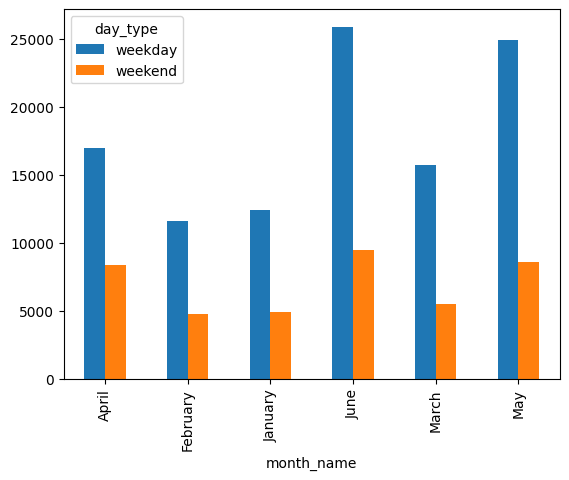

In [ ]:
orders_by_month_day_type.unstack().plot(kind='bar')

In [ ]:
order_by_daily_monthly=df.groupby(['month_name', 'day_of_week'])['transaction_id'].count()

In [ ]:
order_by_daily_monthly

month_name  day_of_week
April       Friday         3201
            Monday         3415
            Saturday       4116
            Sunday         4279
            Thursday       3417
            Tuesday        3390
            Wednesday      3517
February    Friday         2358
            Monday         2373
            Saturday       2321
            Sunday         2433
            Thursday       2325
            Tuesday        2199
            Wednesday      2350
January     Friday         2291
            Monday         2814
            Saturday       2206
            Sunday         2725
            Thursday       2283
            Tuesday        2766
            Wednesday      2229
June        Friday         5960
            Monday         4810
            Saturday       4683
            Sunday         4786
            Thursday       5812
            Tuesday        4801
            Wednesday      4500
March       Friday         3486
            Monday         2816
            Saturday       2732
            Sunday         2738
            Thursday       3486
            Tuesday        2596
            Wednesday      3375
May         Friday         4405
            Monday         5415
            Saturday       4452
            Sunday         4135
            Thursday       4331
            Tuesday        5450
            Wednesday      5339
Name: transaction_id, dtype: int64

<Axes: xlabel='month_name'>

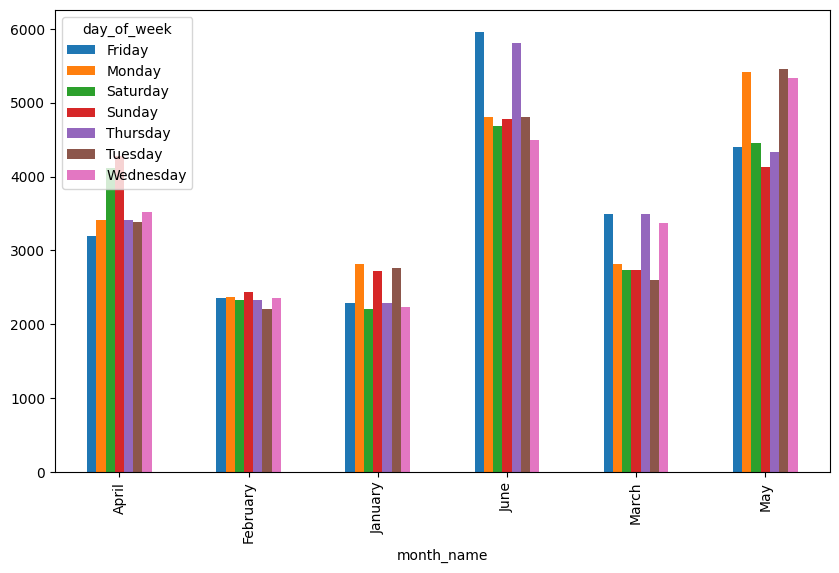

In [ ]:
order_by_daily_monthly.unstack().plot(kind='bar', figsize=(10, 6))

In [ ]:
order_by_daily_hourly=df.groupby(['day_of_week', 'transaction_hour'])['transaction_id'].count()

In [ ]:
order_by_daily_hourly

day_of_week  transaction_hour
Friday       6                    707
             7                   1989
             8                   2544
             9                   2707
             10                  2761
                                 ... 
Wednesday    16                  1272
             17                  1235
             18                  1118
             19                   836
             20                    83
Name: transaction_id, Length: 105, dtype: int64

<Axes: xlabel='day_of_week'>

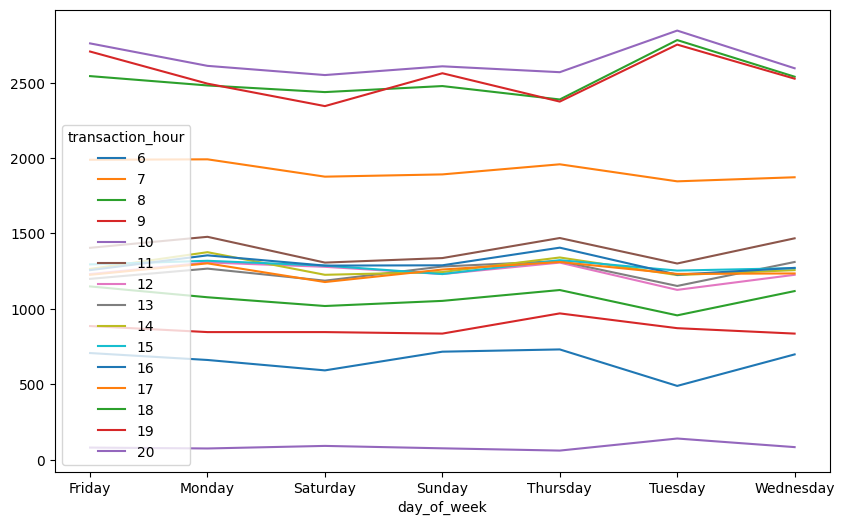

In [ ]:
order_by_daily_hourly.unstack().plot(kind='line', figsize=(10, 6))